# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [433]:
import pandas as pd

In [434]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")  #tab키 누르면 파일 뜬다

In [435]:
CCTV_Seoul.head()  #상위 5개 목록 읽어오기

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [436]:
CCTV_Seoul.tail()  #하위 5개 목록 읽어보기

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [437]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [438]:
CCTV_Seoul.columns[0]

'기관명'

In [439]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [440]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [441]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
) #가독성

In [442]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [443]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace="True"
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## Pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

### Seris
- index와 value로 이루어져 있습니다.
- 한 가지 데이터 타입만 가질 수 있습니다.

In [444]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [445]:
pd.Series()

C:\Temp\ipykernel_1500\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [446]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [447]:
#pd.Series([1,2,3,4], dtype=float64)

In [448]:
pd.Series([1,2,3,4], dtype=np.float64)  #정수형에서 실수형 데이터로 변환

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [449]:
pd.Series([1,2,3,4], dtype=str)  #object는 문자열 데이터

0    1
1    2
2    3
3    4
dtype: object

In [450]:
pd.Series(np.array([1,2,3]))

0    1
1    2
2    3
dtype: int32

In [451]:
pd.Series({"Key": "Value"})

Key    Value
dtype: object

In [452]:
data = pd.Series([1,2,3,4,"5"])  #문자가 하나라도 들어가면 object(문자열)로 인식
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [453]:
# 짝수 찾기
#data % 2

In [454]:
data = pd.Series([1,2,3,4])
data % 2

0    1
1    0
2    1
3    0
dtype: int64

### 날짜 데이터

In [455]:
datas = pd.date_range("20210101", periods=6)
datas

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [456]:
#표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6,4)  #6행 4열, periods=6 맞춰줌
data

array([[-0.59992877, -0.72407602,  0.05869487, -1.26205851],
       [-0.30644302, -0.02506914,  0.591461  , -0.42574351],
       [-0.69188502, -1.98142832, -0.31926129, -0.11342277],
       [ 1.43753908, -0.5684455 ,  1.38435526,  0.14722446],
       [-0.33046473, -1.32337352,  0.6504599 ,  0.85339348],
       [-1.17625489,  0.25956174,  1.28245526, -0.31363805]])

In [457]:
df = pd.DataFrame(data, index=datas, columns=["A","B","C","D"])  #6행 열 DataFrame
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


### 데이터 프레임 정보 탐색

- df.head()

In [458]:
df.head()

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393


- df.tail()

In [459]:
df.tail()

,A,B,C,D
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


- df.index

In [460]:
df.index    #리스트형태로 index값들 반환

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [461]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [462]:
df.values

array([[-0.59992877, -0.72407602,  0.05869487, -1.26205851],
       [-0.30644302, -0.02506914,  0.591461  , -0.42574351],
       [-0.69188502, -1.98142832, -0.31926129, -0.11342277],
       [ 1.43753908, -0.5684455 ,  1.38435526,  0.14722446],
       [-0.33046473, -1.32337352,  0.6504599 ,  0.85339348],
       [-1.17625489,  0.25956174,  1.28245526, -0.31363805]])

- df.info(): 데이터 프레임의 기본 정보 확인

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe(): 데이터 프레임의 기술통계 정보 확인

In [464]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.277906,-0.727138,0.608027,-0.185707
std,0.897601,0.827093,0.666520,0.696895
min,-1.176255,-1.981428,-0.319261,-1.262059
25%,-0.668896,-1.173549,0.191886,-0.397717
50%,-0.465197,-0.646261,0.620960,-0.213530
75%,-0.312448,-0.160913,1.124456,0.082063
max,1.437539,0.259562,1.384355,0.853393


### 데이터 정렬
- sort_values()

In [465]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [466]:
df.sort_values(by="B")  #오름차순 정렬

,A,B,C,D
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [467]:
df.sort_values(by="B", ascending=False, inplace=True)  #내림차순 정렬 inplace=True로 업데이트

In [468]:
df

,A,B,C,D
2021-01-06,-1.176255,0.259562,1.282455,-0.313638
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423


### 데이터 선택

In [469]:
df

,A,B,C,D
2021-01-06,-1.176255,0.259562,1.282455,-0.313638
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423


In [470]:
# 한 개 컬럼 선택
df["A"]

2021-01-06   -1.176255
2021-01-02   -0.306443
2021-01-04    1.437539
2021-01-01   -0.599929
2021-01-05   -0.330465
2021-01-03   -0.691885
Name: A, dtype: float64

In [471]:
type(df["A"])

pandas.core.series.Series

In [472]:
df.A   #컬럼이 알파벳인 경우 []없이 가능

2021-01-06   -1.176255
2021-01-02   -0.306443
2021-01-04    1.437539
2021-01-01   -0.599929
2021-01-05   -0.330465
2021-01-03   -0.691885
Name: A, dtype: float64

In [473]:
df = pd.DataFrame(data, index=datas, columns=["A","B","C", "D"])  #6행 열 DataFrame
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [474]:
df.D

2021-01-01   -1.262059
2021-01-02   -0.425744
2021-01-03   -0.113423
2021-01-04    0.147224
2021-01-05    0.853393
2021-01-06   -0.313638
Freq: D, Name: D, dtype: float64

In [475]:
# 두 개 이상 컬럼 선택
df[["A","B"]]   #["A","B"]리스트 안에 담아준다

,A,B
2021-01-01,-0.599929,-0.724076
2021-01-02,-0.306443,-0.025069
2021-01-03,-0.691885,-1.981428
2021-01-04,1.437539,-0.568446
2021-01-05,-0.330465,-1.323374
2021-01-06,-1.176255,0.259562


### offset index
- [n:m] : n부터 m-1 까지 
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함한다.

In [476]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [477]:
df[0:3]   #0~2까지 출력됨

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423


In [478]:
df["20210101":"20210104"]  #index slice는 0104까지 포함되어 출력됨

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224


- loc : location
- index 이름으로 특정 행, 열을 선택

In [479]:
df.loc[["20210101","20210103"],["A","B"]]   #숫자로 : 형태는 안됨
#1일과 3일의 행만 빼옴
#1일~3일 행이면 , 대신 []없애고 : 붙여준다

,A,B
2021-01-01,-0.599929,-0.724076
2021-01-03,-0.691885,-1.981428


In [480]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [481]:
df.loc[:, ["A","B"]]

,A,B
2021-01-01,-0.599929,-0.724076
2021-01-02,-0.306443,-0.025069
2021-01-03,-0.691885,-1.981428
2021-01-04,1.437539,-0.568446
2021-01-05,-0.330465,-1.323374
2021-01-06,-1.176255,0.259562


In [482]:
df.loc["20210102":"20210104", ["A","D"]]

,A,D
2021-01-02,-0.306443,-0.425744
2021-01-03,-0.691885,-0.113423
2021-01-04,1.437539,0.147224


In [483]:
df.loc["20210102":"20210104", "A":"C"]

,A,B,C
2021-01-02,-0.306443,-0.025069,0.591461
2021-01-03,-0.691885,-1.981428,-0.319261
2021-01-04,1.437539,-0.568446,1.384355


In [484]:
df.loc["20210102", ["A","B"]]

A   -0.306443
B   -0.025069
Name: 2021-01-02 00:00:00, dtype: float64

- iloc : inter location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [485]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [486]:
df.iloc[3]

A    1.437539
B   -0.568446
C    1.384355
D    0.147224
Name: 2021-01-04 00:00:00, dtype: float64

In [487]:
df.iloc[3,2]

1.3843552633392477

In [488]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,1.437539,-0.568446
2021-01-05,-0.330465,-1.323374


In [489]:
df.iloc[[1,2,4], [0,2]]  #특정 행, 열 뽑기

,A,C
2021-01-02,-0.306443,0.591461
2021-01-03,-0.691885,-0.319261
2021-01-05,-0.330465,0.650460


In [490]:
df.iloc[:, 1:3]

,B,C
2021-01-01,-0.724076,0.058695
2021-01-02,-0.025069,0.591461
2021-01-03,-1.981428,-0.319261
2021-01-04,-0.568446,1.384355
2021-01-05,-1.323374,0.650460
2021-01-06,0.259562,1.282455


### condition

In [491]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [492]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택
df["A"] > 0

2021-01-01    False
2021-01-02    False
2021-01-03    False
2021-01-04     True
2021-01-05    False
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [493]:
df[df["A"] > 0]

,A,B,C,D
2021-01-04,1.437539,-0.568446,1.384355,0.147224


In [494]:
df[df>0]

,A,B,C,D
2021-01-01,NaN,NaN,0.058695,NaN
2021-01-02,NaN,NaN,0.591461,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,1.437539,NaN,1.384355,0.147224
2021-01-05,NaN,NaN,0.650460,0.853393
2021-01-06,NaN,0.259562,1.282455,NaN


- NaN : Not a Number  #데이터가 없다

### 컬럼 추가
- 기존 컬럼이 있으면 추가
- 기존 컬럼이 없으면 수정

In [495]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [496]:
df["E"] = ["one", "two", "one", "four", "five", "six"]  #df의 행에 맞추어 열의 데이터를 넣어준다
df

,A,B,C,D,E
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059,one
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744,two
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423,one
2021-01-04,1.437539,-0.568446,1.384355,0.147224,four
2021-01-05,-0.330465,-1.323374,0.650460,0.853393,five
2021-01-06,-1.176255,0.259562,1.282455,-0.313638,six


- isin()
- 특정 요소가 있는지 확인

In [497]:
df["E"].isin(["two"])

2021-01-01    False
2021-01-02     True
2021-01-03    False
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [498]:
df["E"].isin(["two", "five"])

2021-01-01    False
2021-01-02     True
2021-01-03    False
2021-01-04    False
2021-01-05     True
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [499]:
df[df["E"].isin(["two", "five"])]  #마스킹: 조건 True 값 반환

,A,B,C,D,E
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744,two
2021-01-05,-0.330465,-1.323374,0.650460,0.853393,five


### 특정 컬럼 제거

In [500]:
df

,A,B,C,D,E
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059,one
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744,two
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423,one
2021-01-04,1.437539,-0.568446,1.384355,0.147224,four
2021-01-05,-0.330465,-1.323374,0.650460,0.853393,five
2021-01-06,-1.176255,0.259562,1.282455,-0.313638,six


In [501]:
del df["E"]
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [502]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [503]:
df.drop(["D"], axis=1)  #axis=0 가로(행), axis=1 세로(열)

,A,B,C
2021-01-01,-0.599929,-0.724076,0.058695
2021-01-02,-0.306443,-0.025069,0.591461
2021-01-03,-0.691885,-1.981428,-0.319261
2021-01-04,1.437539,-0.568446,1.384355
2021-01-05,-0.330465,-1.323374,0.650460
2021-01-06,-1.176255,0.259562,1.282455


In [504]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [505]:
df.drop(["20210104"], axis=0)

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


### apply()

In [506]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [507]:
df["A"].apply("sum")

-1.667437347060811

In [508]:
df["A"].apply("mean")  #평균

-0.2779062245101352

In [509]:
df["A"].apply("min"), df["A"].apply("max")

(-1.1762548869561391, 1.4375390772545538)

In [510]:
df[["A","D"]].apply("sum")

A   -1.667437
D   -1.114245
dtype: float64

In [511]:
df.apply(np.sum)

A   -1.667437
B   -4.362831
C    3.648165
D   -1.114245
dtype: float64

In [512]:
df.apply(np.mean)  #평균

A   -0.277906
B   -0.727138
C    0.608027
D   -0.185707
dtype: float64

In [513]:
df.apply(np.std)  #표준편차

A    0.819394
B    0.755029
C    0.608447
D    0.636175
dtype: float64

In [514]:
df

,A,B,C,D
2021-01-01,-0.599929,-0.724076,0.058695,-1.262059
2021-01-02,-0.306443,-0.025069,0.591461,-0.425744
2021-01-03,-0.691885,-1.981428,-0.319261,-0.113423
2021-01-04,1.437539,-0.568446,1.384355,0.147224
2021-01-05,-0.330465,-1.323374,0.650460,0.853393
2021-01-06,-1.176255,0.259562,1.282455,-0.313638


In [515]:
#def로 함수 만들기
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [516]:
df["A"].apply(plusminus)  #apply(함수)로 적용

2021-01-01    minus
2021-01-02    minus
2021-01-03    minus
2021-01-04     plus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [517]:
#lambda 함수
df["A"].apply(lambda num: "plus" if num > 0 else "minus")

2021-01-01    minus
2021-01-02    minus
2021-01-03    minus
2021-01-04     plus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [518]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [519]:
CCTV_Seoul.tail()   #head()와 tail()이 이 데이터가 25개의 데이터인 것을 파악

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [520]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [521]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [522]:
#기존 컬럼이 있으면 추가, 없으면 수정
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
)
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훑어보기

In [523]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [524]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [525]:
pop_Seoul.drop([0], axis=0, inplace=True)   #[0]행 삭제 axis=0
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [526]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [527]:
len(pop_Seoul["구별"].unique())  #25개의 구가 있음

25

In [528]:
# 외국인비율, 고령자비율
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [529]:
pop_Seoul.sort_values(["인구수"], ascending=False).head()   #by="인구수"도 가능

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [530]:
pop_Seoul.sort_values(["외국인"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [531]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [532]:
pop_Seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [533]:
pop_Seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 4. 두 데이터 합치기

---

### pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

pd.merge(left, rigth)

In [534]:
#딕셔너리 안의 리스트 형태
left = pd.DataFrame({
    "key" : ["K0", "K4", "K2", "K3"],
    "A" : ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [535]:
#리스트 안의 딕셔너리 형태
right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"}
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 함
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어햐 한다

In [536]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [537]:
pd.merge(left, right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [538]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [539]:
pd.merge(left, right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [540]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [541]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [542]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")   #공통 컬럼값:"구별"
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


### 년도별 데이터 컬럼 삭제
- del
- drop()

In [543]:
del data_result["2013년도 이전"]

In [544]:
del data_result["2014년"]

In [545]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [546]:
data_result.drop(["2015년", "2016년"], axis = 1, inplace=True)

In [547]:
data_result.head(3)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [548]:
data_result.set_index("구별", inplace=True)
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651


#### 상관계수
- corr()
- correlation 의 약자
- 상관계수가 0.2 이상인 데이터를 비교

In [549]:
data_result.corr()   #소계와 인구수간의 상관관계가 가장 높다

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [550]:
data_result.info()   #모두 int차입으로 object타입이 없었으므로 연산이 가능했다

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [551]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [552]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [553]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

# matplotilb 기초

In [554]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
%matplotlib inline
#get_ipython().run_line_magic("matplotlib", "inline")

matplotlib 기본 형태
```
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()
```

C:\anaconda\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


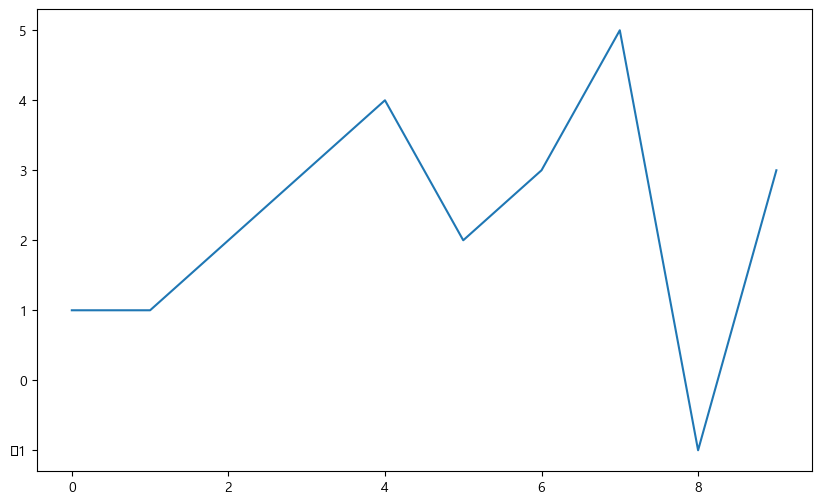

In [555]:
plt.figure(figsize=(10, 6))
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,1,2,3,4,2,3,5,-1,3])

### 예제1: 그래프 기초

####  삼각함수 그리기
- np.arrange(a, b, s): a부터 b까지 s의 간격
- np.sin(value)

In [556]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

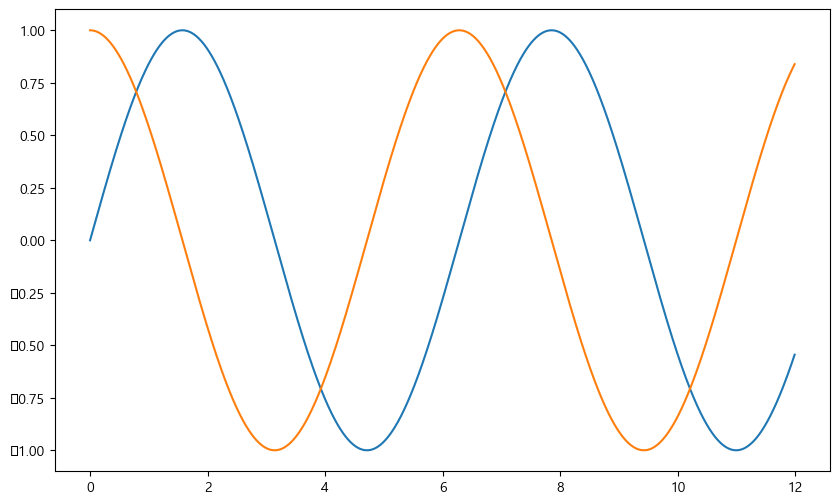

In [557]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 데이터 의미 구분

In [558]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid() #격자무늬 default = True
    plt.legend(loc=2)  #범례   tap+shift 눌러서 위치설정 명령 확인가능
    plt.title('Example of sinewave')  #상단 제목
    plt.xlabel("time")
    plt.ylabel("Amplitude")  #Amplitude: 진폭
    plt.show()

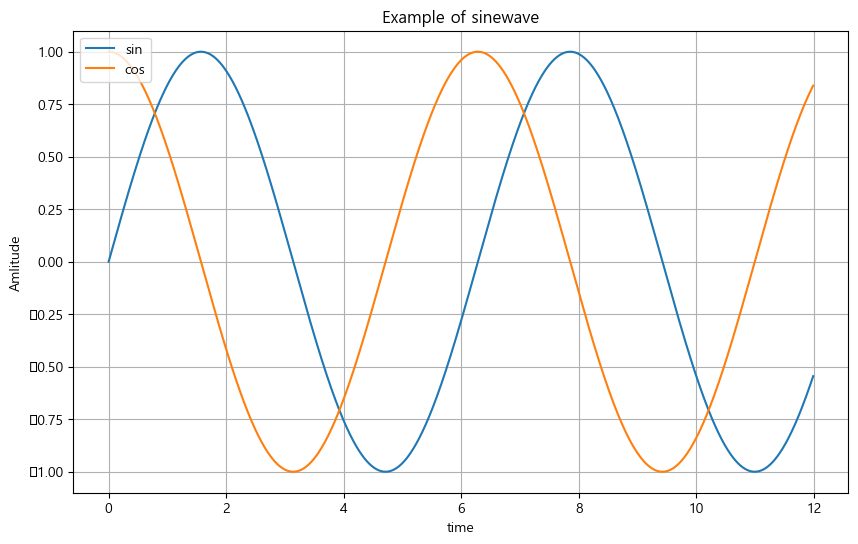

In [559]:
drawGraph()

### 예제2: 그래프 커스텀

In [560]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

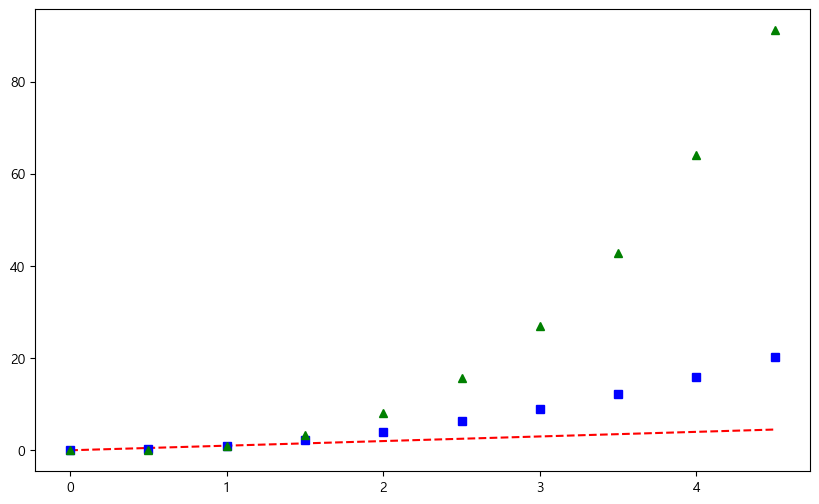

In [561]:
plt.figure(figsize=(10,6))
plt.plot(t,t, "r--")  #red ----
plt.plot(t, t**2, "bs")
plt.plot(t, t**3, "g^")
plt.show()

In [562]:
t = list(range(0,7))  # t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

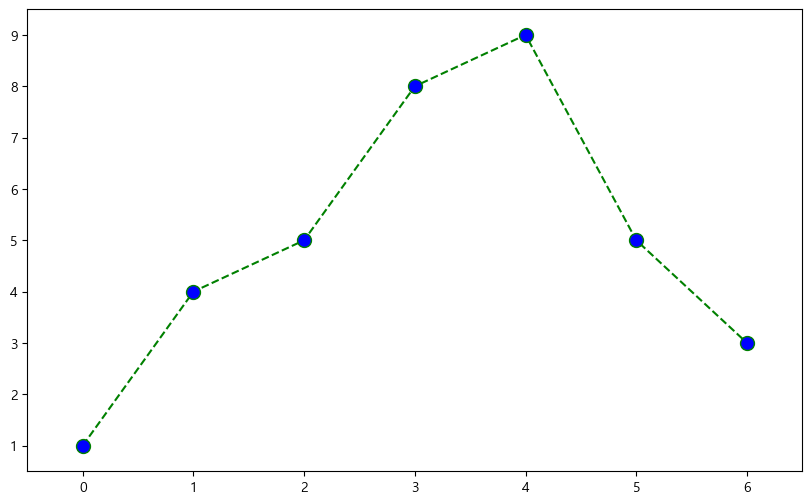

In [563]:
def drawGraph():
    plt.figure(figsize=(10,6))
    plt.plot(
        t, y,
        color = "green",
        linestyle = "--",
        marker = "o",
        markerfacecolor = "blue",
        markersize = 10
    )
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()
    
drawGraph()

### 예제3: scatter plot

In [564]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

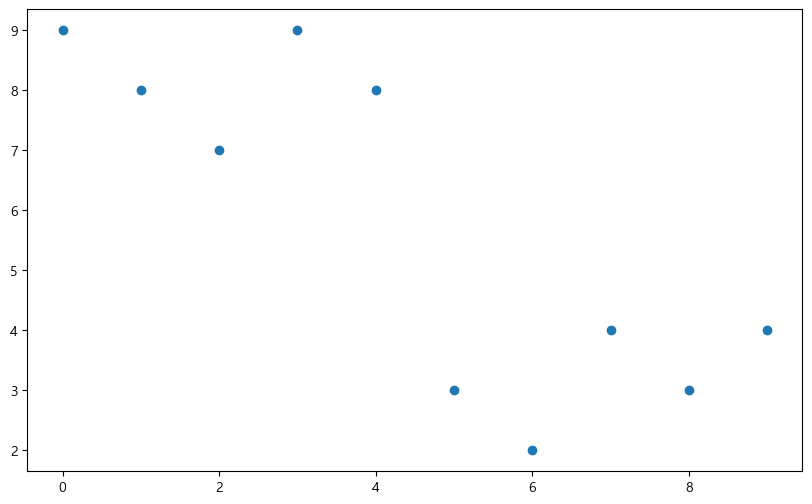

In [565]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)   #산점도
    plt.show()
drawGraph()

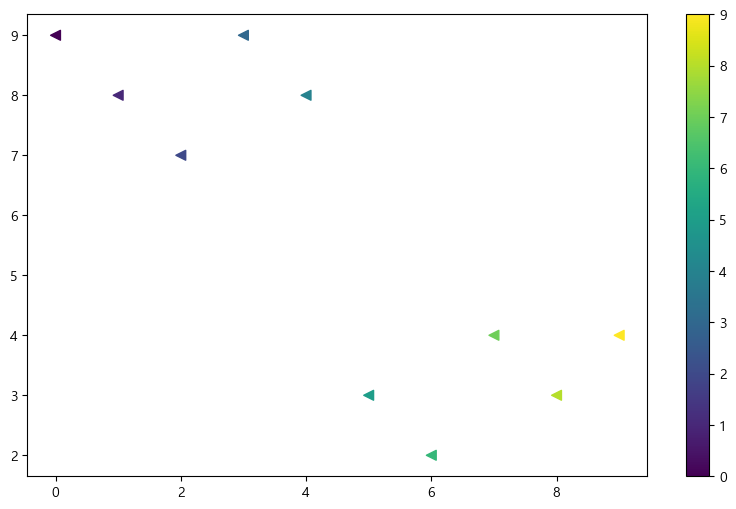

In [566]:
colormap = t

def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=50, c=colormap, marker="<") #산점도
    plt.colorbar()
    plt.show()
drawGraph()

### 예제4: Pandas에서 plot 그리기
- matplotlib 을 가져와서 사용

In [569]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

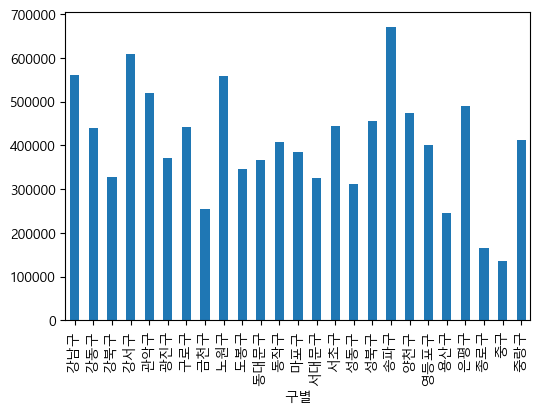

In [570]:
data_result["인구수"].plot(kind="bar", figsize=(6, 4))

<AxesSubplot:ylabel='구별'>

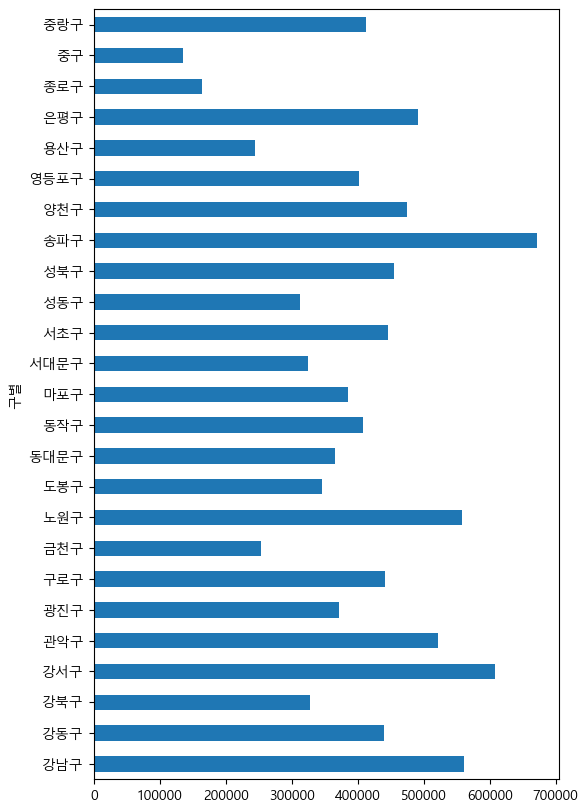

In [574]:
data_result["인구수"].plot(kind="barh", figsize=(6, 10))

---

## 5. 데이터 시각화

In [577]:
import matplotlib.pyplot as plt
#import matplotlib as mpl
plt.rcParams["axes.unicode_minus"] = False #마이너스 부호 때문에 한글이 깨질 수 있어 주는 설정
rc("font", family="Malgun Gothic")
%matplotlib inline
#get_ipython().run_line_magic("matplolib", "inline")

In [578]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

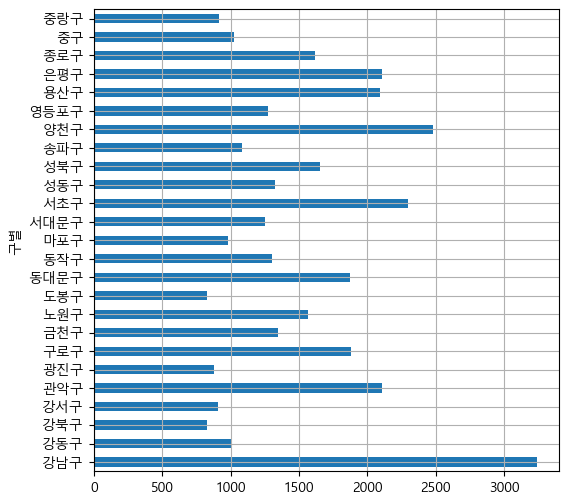

In [582]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(6,6));

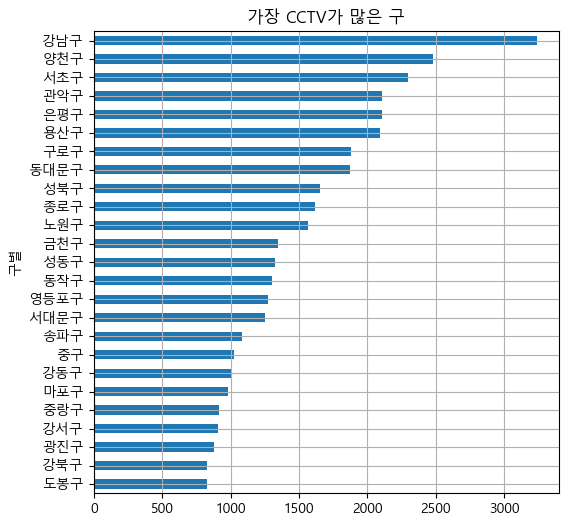

In [586]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(6,6));
drawGraph()

In [587]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


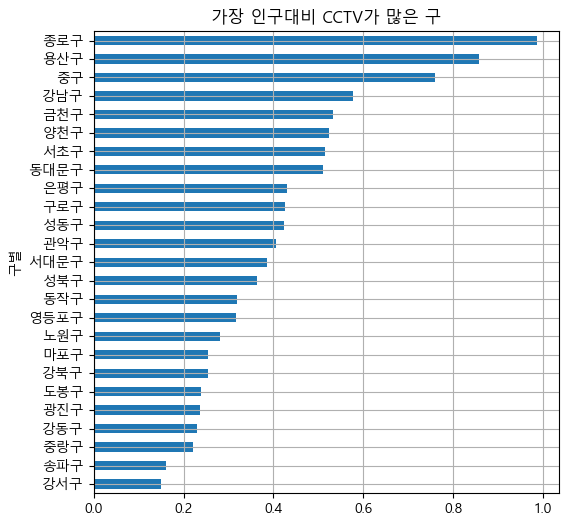

In [588]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 인구대비 CCTV가 많은 구", figsize=(6,6));
drawGraph()

## 6. 데이터의 경향 표시

In [589]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

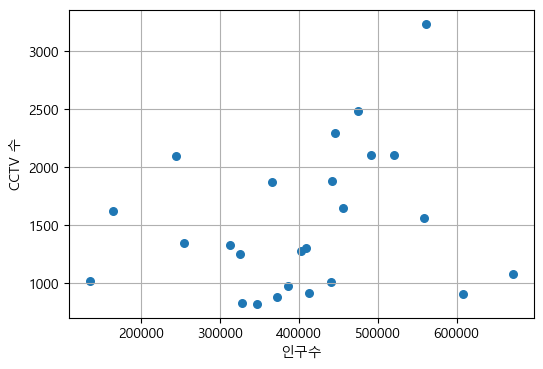

In [606]:
def drawGraph():
    plt.figure(figsize=(6, 4))
    plt.scatter(data_result["인구수"], data_result["소계"], s=30)
    plt.xlabel("인구수")
    plt.ylabel("CCTV 수")
    plt.grid()
    plt.show()
drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.ployfit(): 직선을 구성하기 위한 계수를 계산
- np.ploy1d(): ployfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [598]:
import numpy as np

In [600]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [601]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [602]:
f1(400000)

1509.7809252413338

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?

In [604]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기 위한 x 데이터 생성
- np.linspae(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

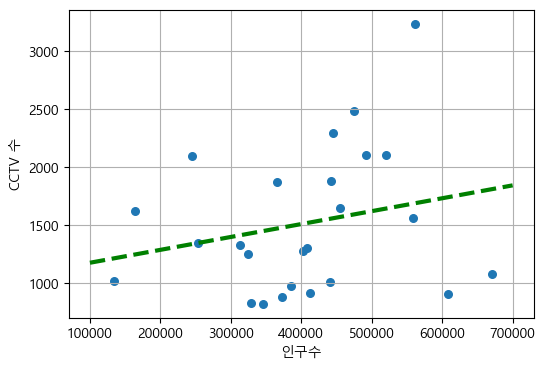

In [607]:
def drawGraph():
    plt.figure(figsize=(6, 4))
    plt.scatter(data_result["인구수"], data_result["소계"], s=30)   #그래프1
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")   #그래프2
    plt.xlabel("인구수")
    plt.ylabel("CCTV 수")
    plt.grid()
    plt.show()
drawGraph()

## 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [612]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [613]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [614]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [615]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [616]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산
df_sort_f = data_result.sort_values(by="오차", ascending=False) #내림차순
df_sort_t = data_result.sort_values(by="오차", ascending=True) #오름차순

In [617]:
#경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [618]:
#경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [624]:
from matplotlib.colors import ListedColormap

#color map을 사용자 정의(user define)로 세팅
                #빨        초          회        초          파       파
color_step = ["#e74c3c", "#2ecc71", "#95a5a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

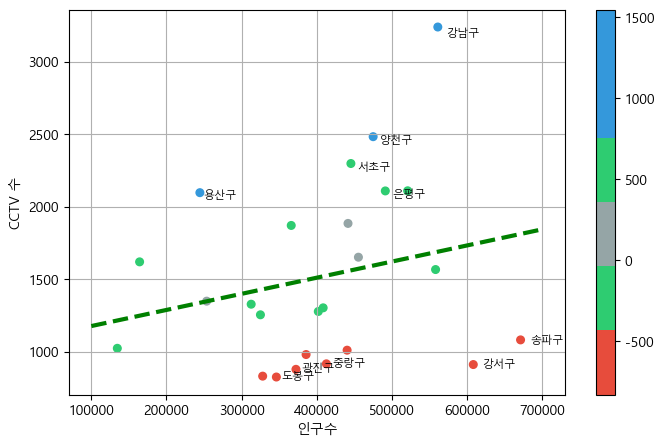

In [638]:
def drawGraph():
    plt.figure(figsize=(8, 5))
    plt.scatter(data_result["인구수"], data_result["소계"], s=30, c=data_result["오차"], cmap=my_cmap)   #그래프1
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")   #그래프2
    
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"][n]*1.02, # x좌표 
            df_sort_f["소계"][n]*0.98,   # y좌표
            df_sort_f.index[n],          # title
            fontsize=8
        )
        #하위 5개
        plt.text(
            df_sort_t["인구수"][n]*1.02,
            df_sort_t["소계"][n]*0.98,
            df_sort_t.index[n],
            fontsize=8
        )
    plt.xlabel("인구수")
    plt.ylabel("CCTV 수")
    plt.colorbar()
    plt.grid()
    plt.show()
drawGraph()

In [639]:
data_result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding="utf-8")